# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Network Slicing in 5G</p>

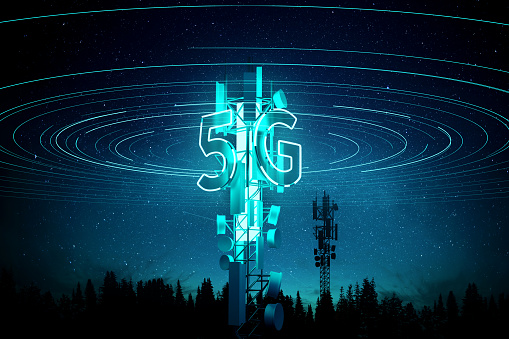

# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Dataset Description</p>

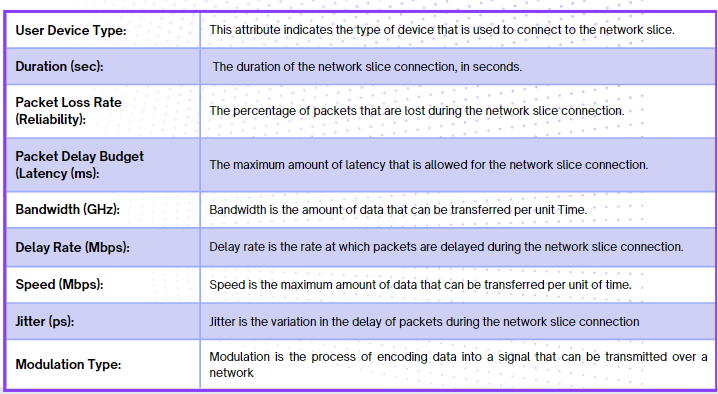

# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Importing Necessary Libraries</p>

In [241]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/generated-test-data/Generated Data.csv
/kaggle/input/5g-dataset/5G_Dataset.csv


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Loading the Dataset</p>

In [242]:
df_final = pd.read_csv("/kaggle/input/5g-dataset/5G_Dataset.csv",na_values=['null'])

In [243]:
df_final.head()

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type,Slice Type
0,SmartPhone,600,0.010000,50,30,17500,1082,43000000.0,FBMC,eMBB
1,SmartPhone,100,0.010000,7,38,1700,2647,45000000.0,FBMC,eMBB
2,SmartPhone,240,0.000010,46,38,900,2821,65000000.0,FBMC,eMBB
3,SmartPhone,120,0.000100,12,50,900,864,77000000.0,FBMC,eMBB
4,SmartPhone,60,0.000001,49,60,1700,1945,33000000.0,FBMC,eMBB


In [244]:
df_final.shape

(3000, 10)

## So we have 3000 records and 10 columns including the Slice Type which is our Target Variable

In [245]:
df_final.describe()

,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03
mean,241.673333,0.004496,29.855333,41.584333,4691.866667,1533.408333,3.883700e+07
std,179.922550,0.004917,13.656399,9.332412,5569.961281,846.788300,2.213678e+07
min,60.000000,0.000001,1.000000,29.000000,300.000000,51.000000,7.500000e+06
25%,100.000000,0.000010,20.000000,36.000000,900.000000,800.750000,1.900000e+07
50%,210.000000,0.000100,28.000000,40.000000,1350.000000,1550.500000,3.700000e+07
75%,300.000000,0.010000,40.000000,50.000000,10125.000000,2250.250000,4.500000e+07
max,600.000000,0.010000,50.000000,60.000000,17500.000000,3000.000000,7.700000e+07


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Checking For Missing Values</p>

In [246]:
df_final.isnull().values.any()

False

## That's Great we dont have any Missing Values in Our Dataset

In [247]:
df_final.dtypes

User Device Type                      object
Duration(sec)                          int64
Paket Loss Rate(Reliability)         float64
Packet Delay Budget( Latency(ms))      int64
Bandwidth(GHz)                         int64
Delay Rate(Mbps)                       int64
Speed(Mbps)                            int64
Jitter(ps)                           float64
Modulation Type                       object
Slice Type                            object
dtype: object

In [248]:
df_final['Slice Type'].value_counts()

Slice Type
URLLC    1299
mMTC     1070
eMBB      631
Name: count, dtype: int64

# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Expolaratory Data Analysis</p>

<Axes: xlabel='Paket Loss Rate(Reliability)', ylabel='Slice Type'>

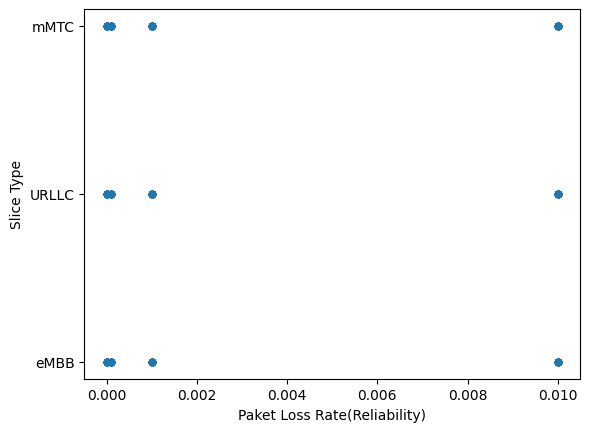

In [249]:
df_final.plot(kind = 'scatter', x = 'Paket Loss Rate(Reliability)' , y = 'Slice Type'  )

<Axes: xlabel='Packet Delay Budget( Latency(ms))', ylabel='Slice Type'>

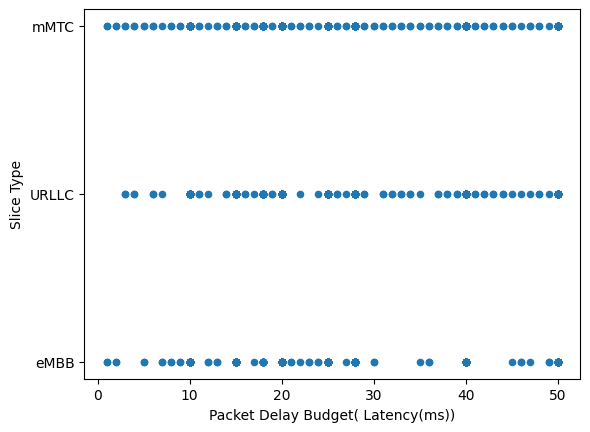

In [250]:
df_final.plot(kind = 'scatter', x = 'Packet Delay Budget( Latency(ms))' , y = 'Slice Type'  )

<Axes: xlabel='Bandwidth(GHz)', ylabel='Slice Type'>

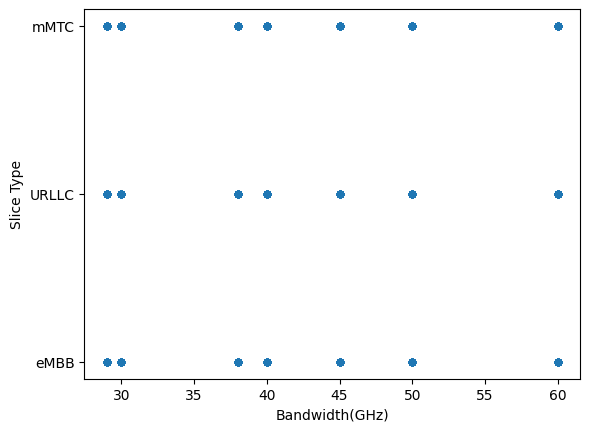

In [251]:
df_final.plot(kind = 'scatter', x = 'Bandwidth(GHz)' , y = 'Slice Type'  )

<Axes: xlabel='Delay Rate(Mbps)', ylabel='Slice Type'>

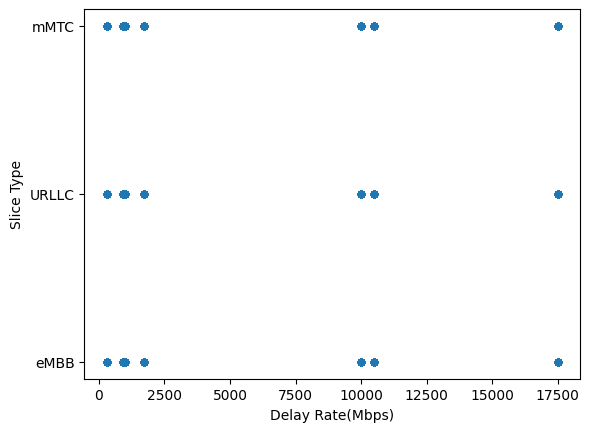

In [252]:
df_final.plot(kind = 'scatter', x = 'Delay Rate(Mbps)' , y = 'Slice Type'  )

<Axes: xlabel='Speed(Mbps)', ylabel='Slice Type'>

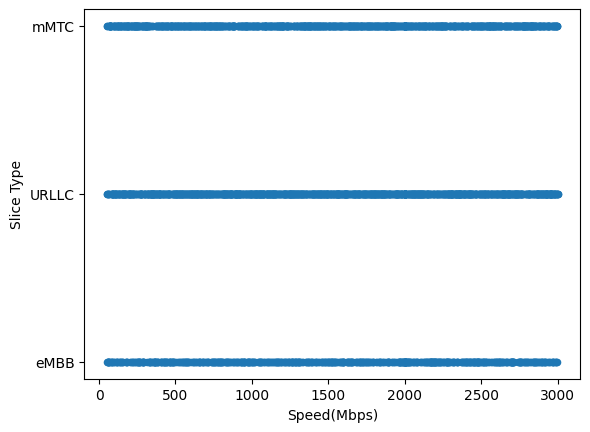

In [253]:
df_final.plot(kind = 'scatter', x = 'Speed(Mbps)' , y = 'Slice Type'  )

<Axes: xlabel='Jitter(ps)', ylabel='Slice Type'>

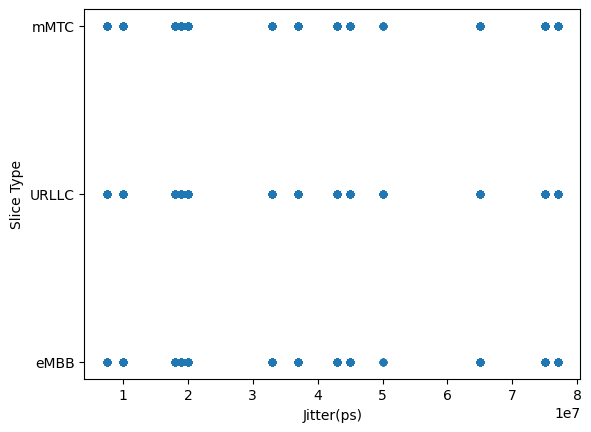

In [254]:
df_final.plot(kind = 'scatter', x = 'Jitter(ps)' , y = 'Slice Type'  )

<Axes: xlabel='Modulation Type', ylabel='Slice Type'>

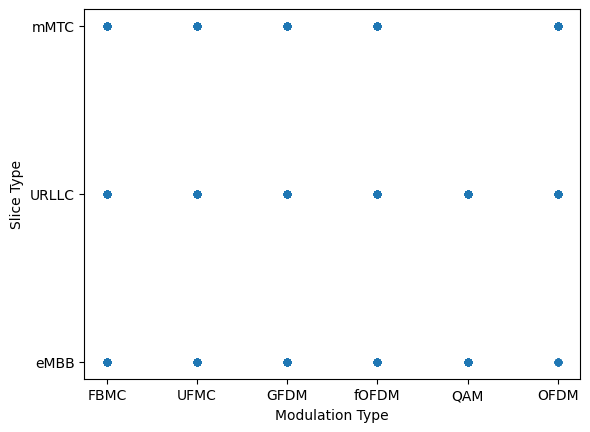

In [255]:
df_final.plot(kind = 'scatter', x = 'Modulation Type' , y = 'Slice Type'  )

<Axes: xlabel='Duration(sec)', ylabel='Slice Type'>

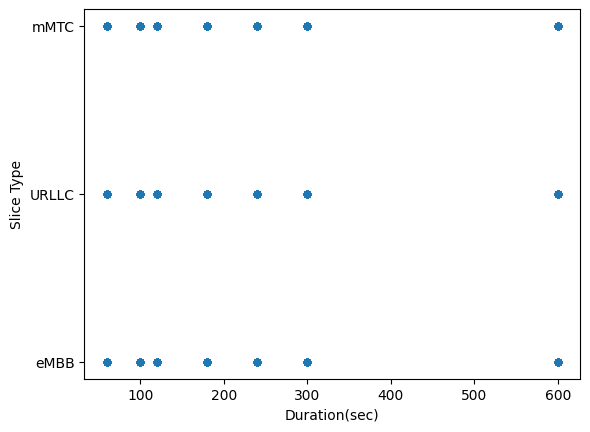

In [256]:
df_final.plot(kind = 'scatter', x = 'Duration(sec)' , y = 'Slice Type'  )

<Axes: xlabel='User Device Type', ylabel='Slice Type'>

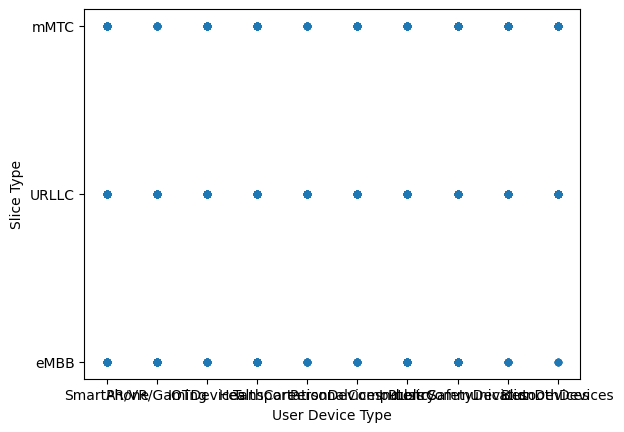

In [257]:
df_final.plot(kind = 'scatter', x = 'User Device Type' , y = 'Slice Type'  )

In [258]:
df_final.rename(
    columns={"User Device Type": "UserDeviceType", "Paket Loss Rate(Reliability)": "PacketLossRate", "Packet Delay Budget( Latency(ms))": "Latency","Bandwidth(GHz)":"Bandwidth","Delay Rate(Mbps)":"DelayRate","Speed(Mbps)":"Speed","Jitter(ps)":"Jitter","Modulation Type":"ModulationType","Slice Type":"SliceType"},
    inplace=True,
)


In [259]:
df_final["SliceType"].unique()

array(['eMBB', 'URLLC', 'mMTC'], dtype=object)

In [260]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle 

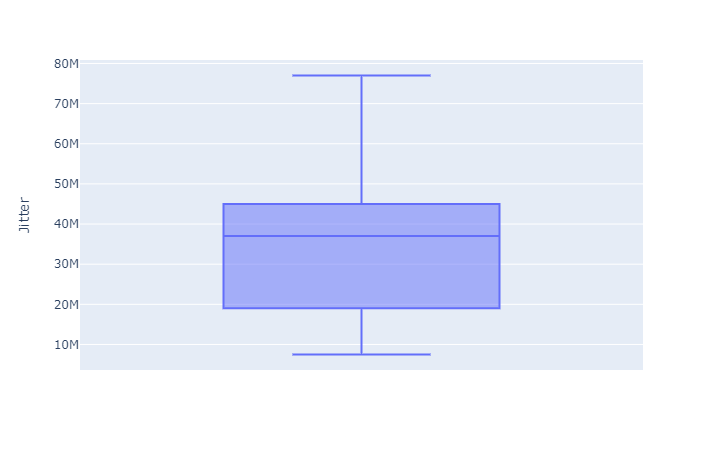

In [261]:
fig = px.box(df_final, y='Jitter')
fig.show()

In [262]:
categoric = ['UserDeviceType', 'ModulationType', 'SliceType']
for cat in categoric:
    print("Value count for: ", cat)
    print(df_final[cat].unique(), df_final[cat].nunique())

Value count for:  UserDeviceType
['SmartPhone' 'AR/VR/Gaming' 'IOTDevices' 'HealthCare'
 'TansportationDevices' 'PersonalComputers' 'Industry'
 'PublicSafetyDevices' 'CommunicationDevices' 'BlutoothDevices'] 10
Value count for:  ModulationType
['FBMC' 'UFMC' 'GFDM' 'fOFDM' 'QAM' 'OFDM'] 6
Value count for:  SliceType
['eMBB' 'URLLC' 'mMTC'] 3


In [263]:
df_final['SliceType'] = df_final['SliceType'].replace({'embb': 'eMBB', 'URLLC': 'URRLC'})

In [264]:
df_final['SliceType'].unique()

array(['eMBB', 'URRLC', 'mMTC'], dtype=object)

In [265]:
lb = LabelEncoder()
for cat in categoric:
    df_final[cat] = lb.fit_transform(df_final[cat])
df_final

,UserDeviceType,Duration(sec),PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType,SliceType
0,8,600,0.010000,50,30,17500,1082,43000000.0,0,1
1,8,100,0.010000,7,38,1700,2647,45000000.0,0,1
2,8,240,0.000010,46,38,900,2821,65000000.0,0,1
3,8,120,0.000100,12,50,900,864,77000000.0,0,1
4,8,60,0.000001,49,60,1700,1945,33000000.0,0,1
...,...,...,...,...,...,...,...,...,...,...
2995,1,180,0.010000,40,38,1700,1476,77000000.0,1,2
2996,1,100,0.000010,28,29,300,512,10000000.0,1,2
2997,1,180,0.000001,25,29,300,1752,65000000.0,1,2
2998,1,300,0.001000,20,45,300,453,45000000.0,1,2


In [266]:
df_final.tail()

,UserDeviceType,Duration(sec),PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType,SliceType
2995,1,180,0.010000,40,38,1700,1476,77000000.0,1,2
2996,1,100,0.000010,28,29,300,512,10000000.0,1,2
2997,1,180,0.000001,25,29,300,1752,65000000.0,1,2
2998,1,300,0.001000,20,45,300,453,45000000.0,1,2
2999,1,600,0.000010,40,38,900,1792,43000000.0,1,2


In [267]:
df_final.sample(5)

,UserDeviceType,Duration(sec),PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType,SliceType
70,8,600,0.010000,50,38,900,343,19000000.0,0,0
1832,6,240,0.000001,50,50,10500,333,45000000.0,5,0
1083,3,120,0.010000,25,40,10500,223,65000000.0,4,1
1448,3,600,0.001000,40,40,17500,399,19000000.0,1,0
2188,5,240,0.010000,25,40,1700,1129,43000000.0,3,0


In [268]:
X = df_final.iloc[:,0:9]
y = df_final.iloc[:,-1]
X

,UserDeviceType,Duration(sec),PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType
0,8,600,0.010000,50,30,17500,1082,43000000.0,0
1,8,100,0.010000,7,38,1700,2647,45000000.0,0
2,8,240,0.000010,46,38,900,2821,65000000.0,0
3,8,120,0.000100,12,50,900,864,77000000.0,0
4,8,60,0.000001,49,60,1700,1945,33000000.0,0
...,...,...,...,...,...,...,...,...,...
2995,1,180,0.010000,40,38,1700,1476,77000000.0,1
2996,1,100,0.000010,28,29,300,512,10000000.0,1
2997,1,180,0.000001,25,29,300,1752,65000000.0,1
2998,1,300,0.001000,20,45,300,453,45000000.0,1


In [269]:
print(X.shape)
print(y.shape)

(3000, 9)
(3000,)


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Test Train Split</p>

In [270]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [271]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 9)
(600, 9)
(2400,)
(600,)


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Scaling the Values</p>

In [272]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000"> Logistic Regression</p>

In [273]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Without Scaling 
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())
# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

#scaling has not much effect


Without Scaling and CV:  0.42833333333333334
Without Scaling and With CV:  0.4341666666666667
With Scaling and Without CV:  0.5066666666666667
With Scaling and With CV:  0.52875


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">SGD Classifier</p>

In [274]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3)

# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())


Without Scaling and CV:  0.42833333333333334
Without Scaling and With CV:  0.3754166666666667
With Scaling and Without CV:  0.4633333333333333
With Scaling and With CV:  0.4987500000000001


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Perceptron</p>

In [275]:
from sklearn.linear_model import Perceptron
# this is same as SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)

clf = Perceptron(tol=1e-3, random_state=0)
# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.42833333333333334
Without Scaling and With CV:  0.3125
With Scaling and Without CV:  0.485
With Scaling and With CV:  0.3983333333333333


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000"> Decision Tree Classifier</p>

In [276]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

#without scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.5916666666666667
Without Scaling and With CV:  0.5833333333333333
With Scaling and Without CV:  0.5916666666666667
With Scaling and With CV:  0.58375


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Random Forest Classifier</p>

In [277]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7066666666666667
Without Scaling and With CV:  0.6908333333333333
With Scaling and Without CV:  0.7066666666666667
With Scaling and With CV:  0.6908333333333333


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Naive Bayes</p>


In [278]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.425
Without Scaling and With CV:  0.425
With Scaling and Without CV:  0.49833333333333335
With Scaling and With CV:  0.5145833333333334


In [279]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())


Without Scaling and CV:  0.37333333333333335
Without Scaling and With CV:  0.36375


In [280]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.5233333333333333
Without Scaling and With CV:  0.5175000000000001
With Scaling and Without CV:  0.5166666666666667
With Scaling and With CV:  0.5266666666666666


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">K-Nearest Neighbors</p>

In [281]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())


# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.36333333333333334
Without Scaling and With CV:  0.38625
With Scaling and Without CV:  0.48833333333333334
With Scaling and With CV:  0.5220833333333333


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Model Selection</p>
### As we can see, among all the algorithm implemented Random Forest gives the max Accuracy.

In [282]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("With CV: ",scores.mean())
#print("Precision Score: ", precision_score(y_test, y_pred))
#print("Recall Score: ", recall_score(y_test, y_pred))
#print("F1 Score: ", f1_score(y_test, y_pred))

Without CV:  0.7066666666666667
With CV:  0.6908333333333333


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000"> Tuning the model</p>
### Using Hyper-Parameter tuning using GridsearchCV Hypertune the parameters for Random forest and get best parameters

In [283]:
param_grid = {
    'bootstrap': [False,True],
    'max_depth': [5,8,10, 20],
    'max_features': [3, 4, 5, None],
    'min_samples_split': [2, 10, 12],
    'n_estimators': [100, 200, 300]
}

rfc = RandomForestClassifier()

clf = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
random_forest = clf.best_estimator_
print("Accuracy: ",accuracy_score(y_test,y_pred))
print(clf.best_params_)
print(clf.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy:  0.72
{'bootstrap': True, 'max_depth': 8, 'max_features': None, 'min_samples_split': 10, 'n_estimators': 200}
RandomForestClassifier(max_depth=8, max_features=None, min_samples_split=10,
                       n_estimators=200)


## Training the final model with best parameters:

# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000"> Deploy the model</p>
### Dump the Model

In [284]:
pickle.dump(clf,open('model.pkl','wb'))

### Load the Model for Usage

In [285]:
model = pickle.load(open('model.pkl','rb'))

In [286]:
df_final.columns

Index(['UserDeviceType', 'Duration(sec)', 'PacketLossRate', 'Latency',
       'Bandwidth', 'DelayRate', 'Speed', 'Jitter', 'ModulationType',
       'SliceType'],
      dtype='object')

In [287]:
df_final.sample(5)

,UserDeviceType,Duration(sec),PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType,SliceType
2008,5,180,0.00010,20,38,1700,1521,7500000.0,5,0
1801,6,600,0.00001,10,40,900,1964,33000000.0,5,0
38,8,300,0.01000,16,50,1000,645,75000000.0,0,0
2964,1,100,0.01000,20,50,10500,1688,45000000.0,1,0
2003,5,100,0.00001,25,50,10000,352,77000000.0,5,0


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000"> Make Predictions</p>

In [288]:
UserDeviceType = 2
Duration = 240
PacketLossRate = 0.00100
Latency = 50
Bandwidth = 60
DelayRate = 900
Speed = 2428
Jitter = 77000000
ModulationType = 2

prediction = clf.predict([[UserDeviceType,Duration,PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType]])
prediction

array([2])

In [289]:
UserDeviceType = 6
Duration = 240
PacketLossRate = 0.100
Latency = 50
Bandwidth = 60
DelayRate = 900
Speed = 2428
Jitter = 77000000
ModulationType = 4

prediction = clf.predict([[UserDeviceType,Duration,PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType]])
prediction

array([0])

# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000"> Try all Classifiers from Sklearn</p>

### Get all the estimators in sklearn(Algorithms)

In [290]:
# Import all estimators list
from sklearn.utils import all_estimators


estimators = all_estimators(type_filter='classifier')
classification_estimators = []
i = 1
for name, class_ in estimators:
    classification_estimators.append(class_.__name__)
    print(f'{i}. {class_.__name__}')
    i += 1

1. AdaBoostClassifier
2. BaggingClassifier
3. BernoulliNB
4. CalibratedClassifierCV
5. CategoricalNB
6. ClassifierChain
7. ComplementNB
8. DecisionTreeClassifier
9. DummyClassifier
10. ExtraTreeClassifier
11. ExtraTreesClassifier
12. GaussianNB
13. GaussianProcessClassifier
14. GradientBoostingClassifier
15. HistGradientBoostingClassifier
16. KNeighborsClassifier
17. LabelPropagation
18. LabelSpreading
19. LinearDiscriminantAnalysis
20. LinearSVC
21. LogisticRegression
22. LogisticRegressionCV
23. MLPClassifier
24. MultiOutputClassifier
25. MultinomialNB
26. NearestCentroid
27. NuSVC
28. OneVsOneClassifier
29. OneVsRestClassifier
30. OutputCodeClassifier
31. PassiveAggressiveClassifier
32. Perceptron
33. QuadraticDiscriminantAnalysis
34. RadiusNeighborsClassifier
35. RandomForestClassifier
36. RidgeClassifier
37. RidgeClassifierCV
38. SGDClassifier
39. SVC
40. StackingClassifier
41. VotingClassifier


In [291]:
for name, class_ in estimators:
    module_name = str(class_).split("'")[1].split(".")[1]
    class_name = class_.__name__
    print(f'from sklearn.{module_name} import {class_name}')

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
fr

In [292]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Train the model using all the algorithms and compare accuracy metrics</p>

### 1. Without Scaling

In [293]:

for estimator in classification_estimators:
    try:
        print("ALgorithm: ", estimator)
        clf = eval(estimator+'()')
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        print("Without CV: ",accuracy_score(y_test,y_pred))
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        print("With CV: ",scores.mean())
        #print("Precision Score: ", precision_score(y_test, y_pred))
       # print("Recall Score: ", recall_score(y_test, y_pred))
        #print("F1 Score: ", f1_score(y_test, y_pred))
        print("____________________________________________________")
    except:
        print("Error")
    


ALgorithm:  AdaBoostClassifier
Without CV:  0.6883333333333334
With CV:  0.6875000000000001
____________________________________________________
ALgorithm:  BaggingClassifier
Without CV:  0.655
With CV:  0.6533333333333333
____________________________________________________
ALgorithm:  BernoulliNB
Without CV:  0.5233333333333333
With CV:  0.5175000000000001
____________________________________________________
ALgorithm:  CalibratedClassifierCV
Without CV:  0.42833333333333334
With CV:  0.4341666666666667
____________________________________________________
ALgorithm:  CategoricalNB
Without CV:  0.625
With CV:  nan
____________________________________________________
ALgorithm:  ClassifierChain
Error
ALgorithm:  ComplementNB
Without CV:  0.37333333333333335
With CV:  0.38708333333333333
____________________________________________________
ALgorithm:  DecisionTreeClassifier
Without CV:  0.59
With CV:  0.5804166666666666
____________________________________________________
ALgorithm:  Du

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide



Without CV:  0.42833333333333334


/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encounte

With CV:  0.4341666666666667
____________________________________________________
ALgorithm:  LabelSpreading


/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide



Without CV:  0.42833333333333334


/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encountered in divide

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning:

invalid value encounte

With CV:  0.4341666666666667
____________________________________________________
ALgorithm:  LinearDiscriminantAnalysis
Without CV:  0.5083333333333333
With CV:  0.5295833333333334
____________________________________________________
ALgorithm:  LinearSVC
Without CV:  0.22833333333333333
With CV:  0.40041666666666675
____________________________________________________
ALgorithm:  LogisticRegression
Without CV:  0.42833333333333334
With CV:  0.4341666666666667
____________________________________________________
ALgorithm:  LogisticRegressionCV
Without CV:  0.42833333333333334
With CV:  0.43458333333333343
____________________________________________________
ALgorithm:  MLPClassifier
Without CV:  0.42833333333333334
With CV:  0.33000000000000007
____________________________________________________
ALgorithm:  MultiOutputClassifier
Error
ALgorithm:  MultinomialNB
Without CV:  0.37333333333333335
With CV:  0.36375
____________________________________________________
ALgorithm:  NearestC

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=8.97144e-19): result may not be accurate.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.84415e-19): result may not be accurate.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.86006e-19): result may not be accurate.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.97092e-19): result may not be accurate.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.00365e-18): result may not be accurate.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.85619e-19): result may not be accurate.

/opt/conda

With CV:  0.4045833333333334
____________________________________________________
ALgorithm:  SGDClassifier
Without CV:  0.3433333333333333
With CV:  0.35791666666666666
____________________________________________________
ALgorithm:  SVC
Without CV:  0.42833333333333334
With CV:  0.4341666666666667
____________________________________________________
ALgorithm:  StackingClassifier
Error
ALgorithm:  VotingClassifier
Error


### 2.With Scaling

In [294]:
for estimator in classification_estimators:
    try:
        print("ALgorithm: ", estimator)
        clf = eval(estimator+'()')
        clf.fit(X_train_scale,y_train)
        y_pred = clf.predict(X_test_scale)
        print("Without CV: ",accuracy_score(y_test,y_pred))
        scores = cross_val_score(clf, X_train_scale, y_train, cv=10)
        print("With CV: ",scores.mean())
        #print("Precision Score: ", precision_score(y_test, y_pred))
        #print("Recall Score: ", recall_score(y_test, y_pred))
        #print("F1 Score: ", f1_score(y_test, y_pred))
        print("____________________________________________________")
    except:
        print("Error")

ALgorithm:  AdaBoostClassifier
Without CV:  0.6883333333333334
With CV:  0.6870833333333334
____________________________________________________
ALgorithm:  BaggingClassifier
Without CV:  0.6583333333333333
With CV:  0.6491666666666667
____________________________________________________
ALgorithm:  BernoulliNB
Without CV:  0.5166666666666667
With CV:  0.5266666666666666
____________________________________________________
ALgorithm:  CalibratedClassifierCV
Without CV:  0.5066666666666667
With CV:  0.5291666666666667
____________________________________________________
ALgorithm:  CategoricalNB
Error
ALgorithm:  ClassifierChain
Error
ALgorithm:  ComplementNB
Error
ALgorithm:  DecisionTreeClassifier
Without CV:  0.5933333333333334
With CV:  0.5758333333333334
____________________________________________________
ALgorithm:  DummyClassifier
Without CV:  0.42833333333333334
With CV:  0.4341666666666667
____________________________________________________
ALgorithm:  ExtraTreeClassifier
Wit

### With the above analysis, we have found that we get highest accuracy with GradientBoostingClassifier. using this we now tune the parameters to get best parameters

# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Train using best parameters</p>

In [295]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Random Forest Classifier</p>

In [318]:
# random forest classifier
param_grid = {
    'bootstrap': [False,True],
    'max_depth': [5,8,10, 20],
    'max_features': [3, 4, 5, None],
    'min_samples_split': [2, 10, 12],
    'n_estimators': [100, 200, 300]
}

rfc = RandomForestClassifier()

grid_random_forest = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

grid_random_forest.fit(X_train,y_train)
y_pred_rfc = grid_random_forest.predict(X_test)
best_random_forest_estimator = grid_random_forest.best_estimator_
print("Accuracy: ",accuracy_score(y_test,y_pred_rfc))
print(grid_random_forest.best_params_)
print(grid_random_forest.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy:  0.7166666666666667
{'bootstrap': True, 'max_depth': 8, 'max_features': None, 'min_samples_split': 12, 'n_estimators': 300}
RandomForestClassifier(max_depth=8, max_features=None, min_samples_split=12,
                       n_estimators=300)


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">AdaBoost Classifier</p>

In [297]:
# AdaBoost Classifier
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Replace 'base_estimator' with 'estimator'
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), random_state=42)
grid_adaboost = GridSearchCV(estimator=adaboost, param_grid=param_grid_adaboost, cv=5, n_jobs=-1, verbose=1)
grid_adaboost.fit(X_train, y_train)
best_adaboost_estimator = grid_adaboost.best_estimator_
y_pred_ad = grid_adaboost.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ad))
print(grid_adaboost.best_params_)
print(grid_adaboost.best_estimator_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Accuracy:  0.73
{'learning_rate': 0.01, 'n_estimators': 50}
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.01, random_state=42)


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Gradient Boosting Classifier</p>

In [298]:

# Gradient Boosting Classifier
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

gradient_boosting = GradientBoostingClassifier(random_state=42)
grid_gradient_boosting = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gradient_boosting, cv=5, n_jobs=-1, verbose=1)
grid_gradient_boosting.fit(X_train, y_train)
best_gradient_boosting_estimator = grid_gradient_boosting.best_estimator_
y_pred_gb = grid_gradient_boosting.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_gb))
print(grid_gradient_boosting.best_params_)
print(grid_gradient_boosting.best_estimator_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Accuracy:  0.715
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           random_state=42)


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Extra Trees Classifier</p>

In [299]:

# Extra Trees Classifier
param_grid_extra_trees = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': [ 'sqrt', 'log2']
}

extra_trees = ExtraTreesClassifier(random_state=42)
grid_extra_trees = GridSearchCV(estimator=extra_trees, param_grid=param_grid_extra_trees, cv=5, n_jobs=-1, verbose=1)
grid_extra_trees.fit(X_train, y_train)
best_extra_trees_estimator = grid_extra_trees.best_estimator_
y_pred_et = grid_extra_trees.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_et))
print(grid_extra_trees.best_params_)
print(grid_extra_trees.best_estimator_)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Accuracy:  0.7
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
ExtraTreesClassifier(max_depth=10, random_state=42)


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Bagging Classifier</p>

In [300]:
# Bagging Classifier
param_grid_bagging = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False]
}

bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)
grid_bagging = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid_bagging, cv=5, n_jobs=-1, verbose=1)
grid_bagging.fit(X_train, y_train)
best_bagging_estimator = grid_bagging.best_estimator_
y_pred_bg = grid_bagging.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_bg))
print(grid_bagging.best_params_)
print(grid_bagging.best_estimator_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy:  0.705
{'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200}
BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=0.5, n_estimators=200, random_state=42)


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Decision Tree Classifier</p>

In [301]:
# Decision Tree Classifier
param_grid_decision_tree = {
    'max_depth': [None, 5, 10],
    'max_features': [ 'sqrt', 'log2']
}

decision_tree = DecisionTreeClassifier(random_state=42)
grid_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_decision_tree, cv=5, n_jobs=-1, verbose=1)
grid_decision_tree.fit(X_train, y_train)
best_decision_tree_estimator = grid_decision_tree.best_estimator_
y_pred_dt = grid_decision_tree.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_dt))
print(grid_decision_tree.best_params_)
print(grid_decision_tree.best_estimator_)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy:  0.6283333333333333
{'max_depth': 10, 'max_features': 'sqrt'}
DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=42)


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Multi Layer Perceptron Classifier</p>

In [302]:
# MLP Classifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'max_iter': [100, 200, 300]
}

mlp_classifier = MLPClassifier(random_state=42)
grid_mlp = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid_mlp, cv=5, n_jobs=-1, verbose=1)
grid_mlp.fit(X_train, y_train)
best_mlp_estimator = grid_mlp.best_estimator_
y_pred_mlp = grid_mlp.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_mlp))
print(grid_mlp.best_params_)
print(grid_mlp.best_estimator_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy:  0.42833333333333334
{'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'max_iter': 100, 'solver': 'adam'}
MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=100,
              random_state=42)


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Using Best Estimators to make Predictions</p>

In [319]:
# Use the best estimators to make predictions
y_pred_random_forest = best_random_forest_estimator.predict(X_test)
y_pred_adaboost = best_adaboost_estimator.predict(X_test)
y_pred_gradient_boosting = best_gradient_boosting_estimator.predict(X_test)
y_pred_extra_trees = best_extra_trees_estimator.predict(X_test)
y_pred_bagging = best_bagging_estimator.predict(X_test)
y_pred_decision_tree = best_decision_tree_estimator.predict(X_test)
y_pred_mlp = best_mlp_estimator.predict(X_test)



In [320]:
# Evaluate the models
accuracy_random_forest = accuracy_score(y_test, y_pred_rfc)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)



In [321]:
print("Random Forest Classifier Accuracy: ",accuracy_random_forest)
print("AdaBoost Classifier Accuracy:", accuracy_adaboost)
print("Gradient Boosting Classifier Accuracy:", accuracy_gradient_boosting)
print("Extra Trees Classifier Accuracy:", accuracy_extra_trees)
print("Bagging Classifier Accuracy:", accuracy_bagging)
print("Decision Tree Classifier Accuracy:", accuracy_decision_tree)
print("MLP Classifier Accuracy:", accuracy_mlp)


Random Forest Classifier Accuracy:  0.7166666666666667
AdaBoost Classifier Accuracy: 0.73
Gradient Boosting Classifier Accuracy: 0.715
Extra Trees Classifier Accuracy: 0.7
Bagging Classifier Accuracy: 0.705
Decision Tree Classifier Accuracy: 0.6283333333333333
MLP Classifier Accuracy: 0.42833333333333334


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Stacking Classifier</p>

In [337]:
# Stacking Classifier
stacking_models = [
    ('rfc', random_forest),
    ('adaboost', adaboost),
    ('gradient_boosting', gradient_boosting),
    ('extra_trees', extra_trees),
    ('bagging', bagging_classifier),
    ('decision_tree', decision_tree),
    #('lstm', lstm_model),
    ('mlp', mlp_classifier)
]

stacking_classifier = StackingClassifier(estimators=stacking_models, final_estimator=LogisticRegression(), cv=5)
stacking_classifier.fit(X_train_scale, y_train)



StackingClassifier(cv=5,
                   estimators=[('rfc',
                                RandomForestClassifier(max_depth=8,
                                                       max_features=None,
                                                       min_samples_split=10,
                                                       n_estimators=200)),
                               ('adaboost',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                                                   random_state=42)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('extra_trees',
                                ExtraTreesClassifier(random_state=42)),
                               ('bagging',
                                BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                  random_state=42)),
                               ('decision_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('mlp', MLPClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [338]:
# Evaluate the stacking classifier
stacking_predictions = stacking_classifier.predict(X_test_scale)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("Stacking Classifier Accuracy:", stacking_accuracy)



Stacking Classifier Accuracy: 0.725


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Voting Classifier</p>

In [334]:
# Voting Classifier
voting_models = [
    ('rf', random_forest),
    ('adaboost', adaboost),
    ('gradient_boosting', gradient_boosting),
    ('extra_trees', extra_trees),
    ('bagging', bagging_classifier),
    ('decision_tree', decision_tree),
    #('lstm', lstm_model),
    ('mlp', mlp_classifier)
]



In [335]:
# Hard Voting Classifier
voting_hard = VotingClassifier(estimators=voting_models, voting='hard')
voting_hard.fit(X_train_scale, y_train)
voting_hard_predictions = voting_hard.predict(X_test_scale)
voting_hard_accuracy = accuracy_score(y_test, voting_hard_predictions)
print("Hard Voting Classifier Accuracy:", voting_hard_accuracy)



Hard Voting Classifier Accuracy: 0.71


In [336]:
# Soft Voting Classifier
voting_soft = VotingClassifier(estimators=voting_models, voting='soft')
voting_soft.fit(X_train_scale, y_train)
voting_soft_predictions = voting_soft.predict(X_test_scale)
voting_soft_accuracy = accuracy_score(y_test, voting_soft_predictions)
print("Soft Voting Classifier Accuracy:", voting_soft_accuracy)

Soft Voting Classifier Accuracy: 0.6716666666666666


# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Making Predictions on Generated Data</p>

In [342]:
test_data = pd.read_csv('/kaggle/input/generated-test-data/Generated Data.csv')

In [343]:
categoric = ['User Device Type', 'Modulation Type', 'Slice Type']
for cat in categoric:
    print("Value count for: ", cat)
    print(test_data[cat].unique(), test_data[cat].nunique())

Value count for:  User Device Type
['HealthCare' 'PublicSafetyDevices' 'SmartPhone' 'Industry' 'IOTDevices'
 'BlutoothDevices' 'AR/VR/Gaming' 'CommunicationDevices'
 'PersonalComputers'] 9
Value count for:  Modulation Type
['GFDM' 'OFDM' 'FBMC' 'fOFDM' 'QAM' 'UFMC'] 6
Value count for:  Slice Type
['eMBB' 'URLLC' 'mMTC'] 3


In [344]:
test_data['Slice Type'] = test_data['Slice Type'].replace({'embb': 'eMBB', 'URLLC': 'URRLC'})


In [345]:
lb = LabelEncoder()
for cat in categoric:
    test_data[cat] = lb.fit_transform(test_data[cat])
test_data

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type,Slice Type
0,3,184,0.010000,50,30,1269,667,65705924.0,1,1
1,3,303,0.010000,28,60,679,1395,44443960.0,1,0
2,7,302,0.000617,15,50,656,1821,66250242.0,2,2
3,8,296,0.000468,40,38,10220,1643,34400598.0,0,2
4,3,600,0.009832,49,40,917,2001,11267050.0,1,1
...,...,...,...,...,...,...,...,...,...,...
95,3,293,0.000001,20,38,10247,1012,43568845.0,4,2
96,5,104,0.000325,49,50,1027,339,45426779.0,3,1
97,0,295,0.000413,15,50,10275,365,65390777.0,0,1
98,6,238,0.000001,50,40,722,228,17474480.0,5,0


In [346]:
test_data.rename(
    columns={"User Device Type": "UserDeviceType", "Paket Loss Rate(Reliability)": "PacketLossRate", "Packet Delay Budget( Latency(ms))": "Latency","Bandwidth(GHz)":"Bandwidth","Delay Rate(Mbps)":"DelayRate","Speed(Mbps)":"Speed","Jitter(ps)":"Jitter","Modulation Type":"ModulationType","Slice Type":"SliceType"},
    inplace=True,
)

In [347]:

test_data = test_data.drop(columns=['SliceType'], axis=1)

In [348]:
X_test = test_data

In [358]:
y_predict = best_adaboost_estimator.predict(X_test)


In [359]:
# Create a DataFrame with predictions
predictions_df = pd.DataFrame({'Prediction': y_predict})
# Include other attributes from the test dataset
predictions_df['SliceType'] = testing_df['SliceType']
predictions_df['User Device Type'] = testing_df['UserDeviceType']  
predictions_df['Duration(sec)'] = testing_df['Duration(sec)'] 
predictions_df['Paket Loss Rate(Reliability)'] = testing_df['PacketLossRate'] 
predictions_df['Packet Delay Budget( Latency(ms))'] = testing_df['Latency'] 
predictions_df['Bandwidth(GHz)'] = testing_df['Bandwidth'] 
predictions_df['Delay Rate(Mbps)'] = testing_df['DelayRate'] 
predictions_df['Speed(Mbps)'] = testing_df['Speed'] 
predictions_df['Jitter(ps)'] = testing_df['Jitter'] 
predictions_df['Modulation Type'] = testing_df['ModulationType'] 


In [360]:
# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

# <p style="padding:15px; background-color:#362FD9; font-family:JetBrains Mono; font-weight:bold; color:#000000; font-size:100%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #000000">Thank You</p>